In [1]:
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

a) Download train.csv and test.csv from here https://goo.gl/do3PJY 


Import Data

In [2]:
train = pd.read_csv('train.csv',index_col = 0)

In [3]:
test = pd.read_csv('test.csv',index_col = 0)

b) Perform simple Exploratory Data Analysis on train.csv and test.csv


Simple EDA

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      9999 non-null   float64
 1   x2      9999 non-null   float64
 2   y       9999 non-null   float64
dtypes: float64(3)
memory usage: 312.5 KB


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      9999 non-null   float64
 1   x2      9999 non-null   float64
 2   y       9999 non-null   float64
dtypes: float64(3)
memory usage: 312.5 KB


In [6]:
train.head()

,x1,x2,y
index,,,
0,1.543500,0.718659,2.504393
1,1.721699,1.761218,16.777724
2,1.029734,0.946516,2.898218
3,1.874671,1.921898,21.753827
4,1.914601,1.017112,6.222516


In [7]:
train.head()

,x1,x2,y
index,,,
0,1.543500,0.718659,2.504393
1,1.721699,1.761218,16.777724
2,1.029734,0.946516,2.898218
3,1.874671,1.921898,21.753827
4,1.914601,1.017112,6.222516


<AxesSubplot:>

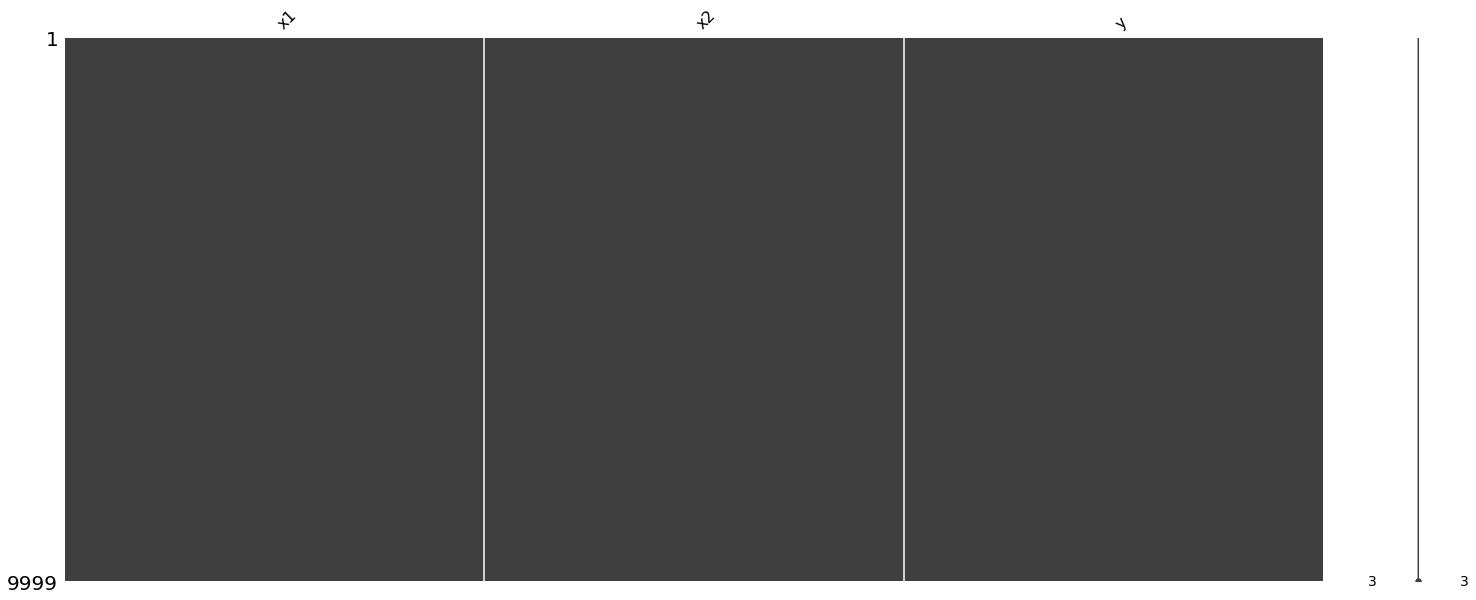

In [8]:
msno.matrix(train)

<AxesSubplot:>

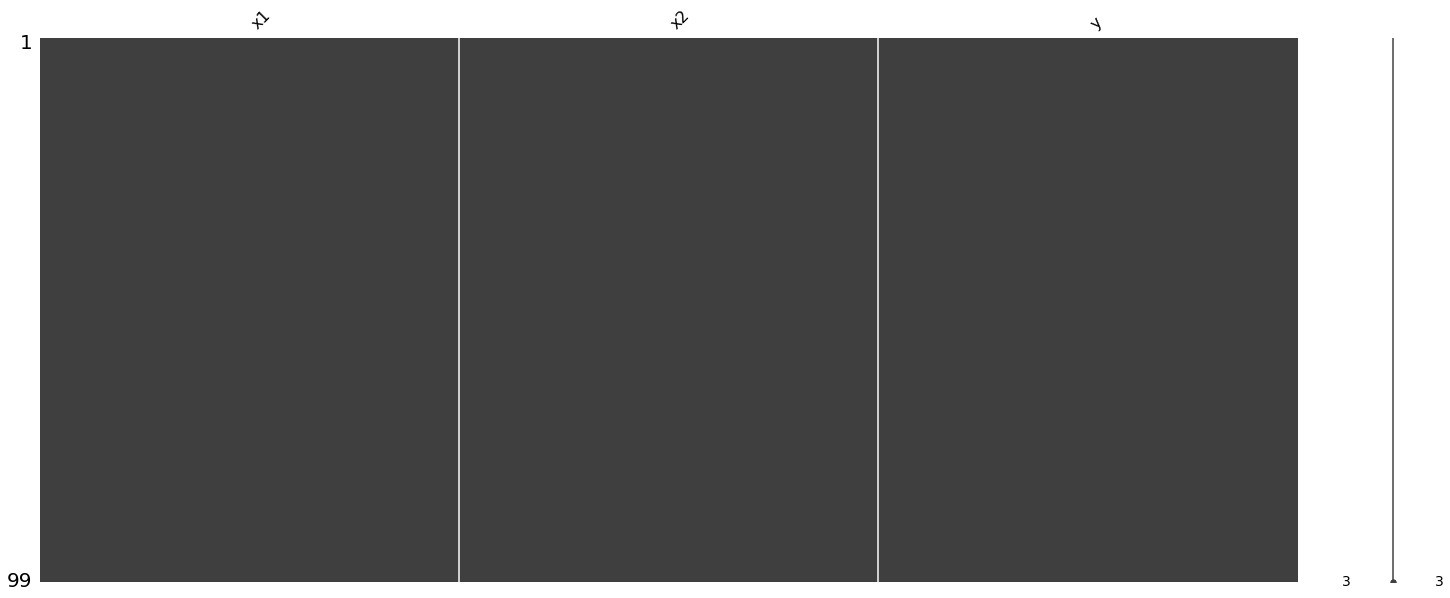

In [9]:
msno.matrix(test)

No missing value on train and test

In [10]:
train.describe()

,x1,x2,y
count,9999.000000,9999.000000,9999.000000
mean,1.254987,1.240495,6.802592
std,0.434357,0.437067,5.145863
min,0.500276,0.500349,0.409952
25%,0.877843,0.859612,2.633788
50%,1.257325,1.230718,5.399104
75%,1.637378,1.617182,9.644745
max,1.999694,1.999858,24.888137


In [11]:
test.describe()

,x1,x2,y
count,99.000000,99.000000,99.000000
mean,2.529453,2.537210,51.853812
std,0.273708,0.303069,13.202425
min,2.022688,2.005927,26.615201
25%,2.321216,2.313501,40.555725
50%,2.517855,2.574454,52.256939
75%,2.773108,2.805113,60.926427
max,2.985324,2.994136,78.830809


<Figure size 720x360 with 0 Axes>

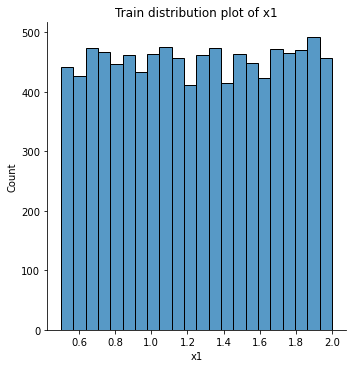

<Figure size 720x360 with 0 Axes>

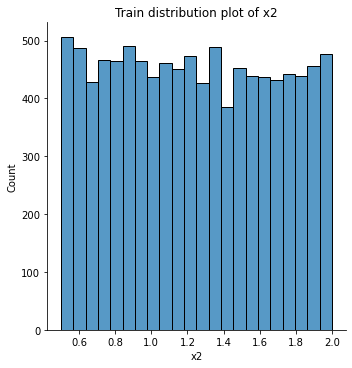

<Figure size 720x360 with 0 Axes>

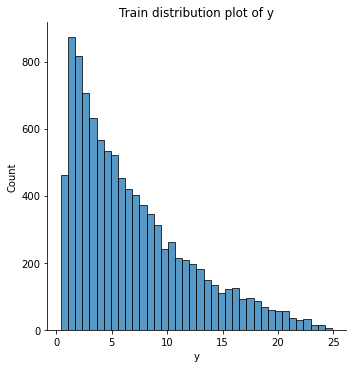

In [12]:
for j in ['x1','x2','y']:
    plt.figure(figsize=(10,5))
    sns.displot(train, x=j)
    plt.title('Train distribution plot of ' + j )
    plt.show()

<Figure size 720x360 with 0 Axes>

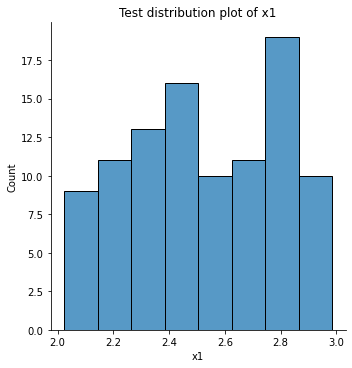

<Figure size 720x360 with 0 Axes>

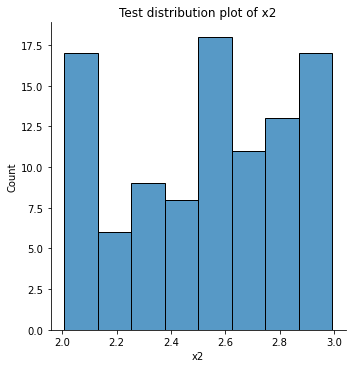

<Figure size 720x360 with 0 Axes>

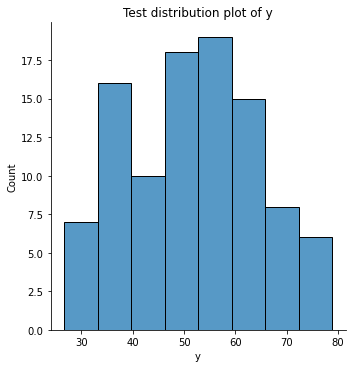

In [13]:
for j in ['x1','x2','y']:
    plt.figure(figsize=(10,5))
    sns.displot(test, x=j)
    plt.title('Test distribution plot of ' + j )
    plt.show()

Check if train and test overlap

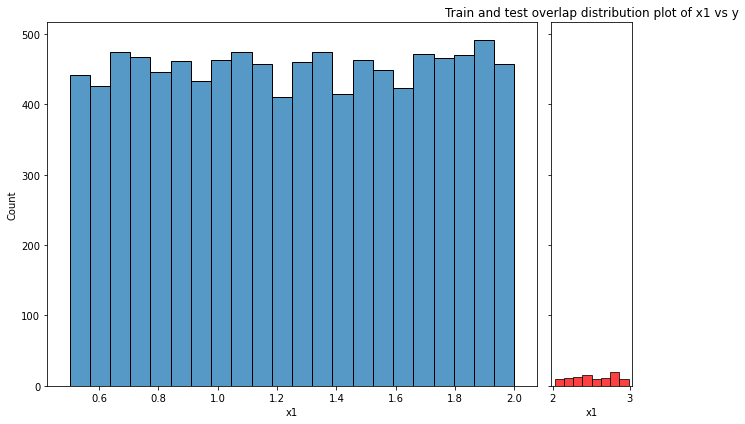

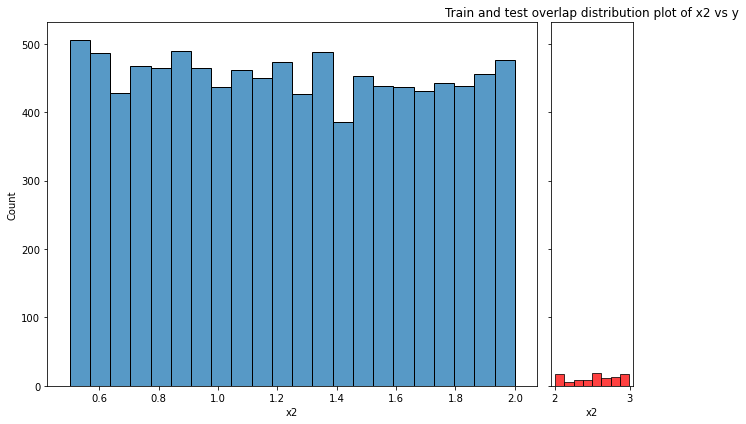

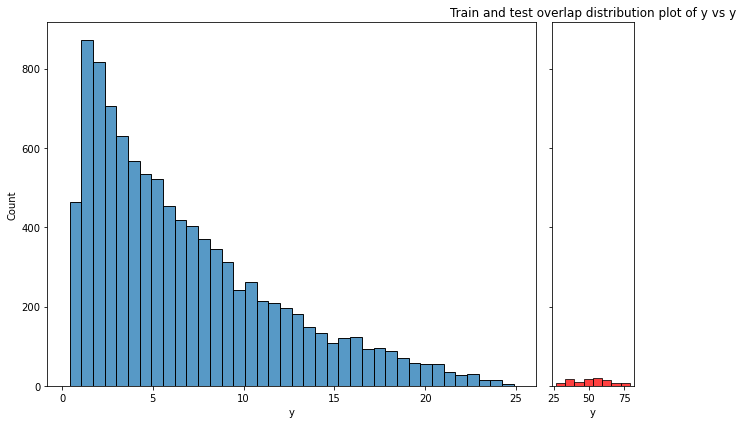

In [14]:
for j in ['x1','x2','y']:
  
    f, axs = plt.subplots(1,2,
                      figsize=(9,6),
                      sharey=True,
                     gridspec_kw=dict(width_ratios=[3,0.5]))
    sns.histplot(train, x=j,ax=axs[0])
    sns.histplot(test, x=j,ax=axs[1],color='red')
    plt.title('Train and test overlap distribution plot of ' + j + ' vs y')
    f.tight_layout()

/Users/ikmalsyafiqmahadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


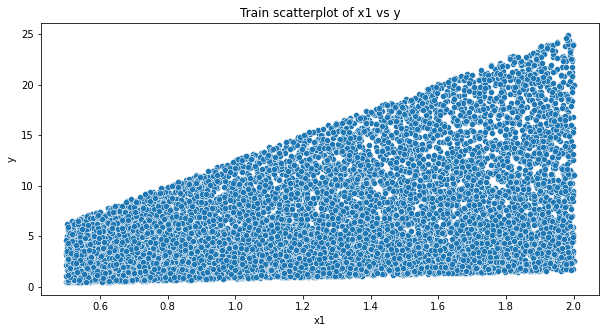

/Users/ikmalsyafiqmahadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


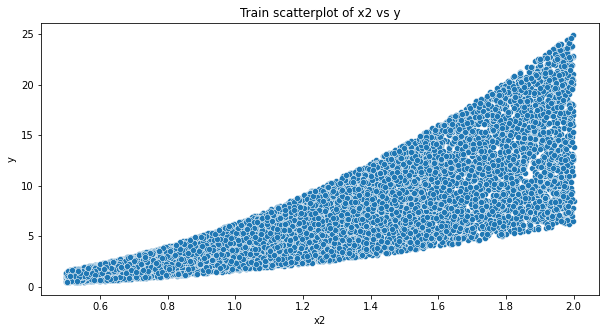

In [15]:
for i in ['x1','x2']:
    plt.figure(figsize=(10,5))
    plt.title('Train scatterplot of ' + i + ' vs y')
    plt.xlabel(i)
    plt.ylabel('y')
    sns.scatterplot(train[i],train['y'])
    plt.show()

/Users/ikmalsyafiqmahadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


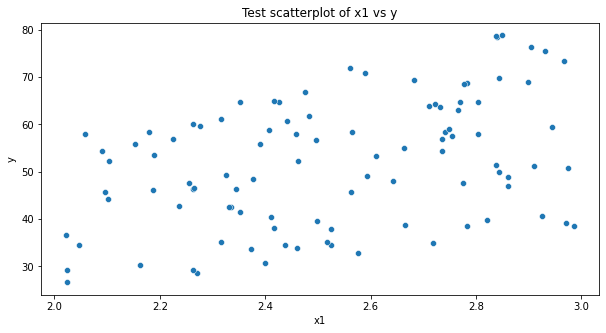

/Users/ikmalsyafiqmahadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


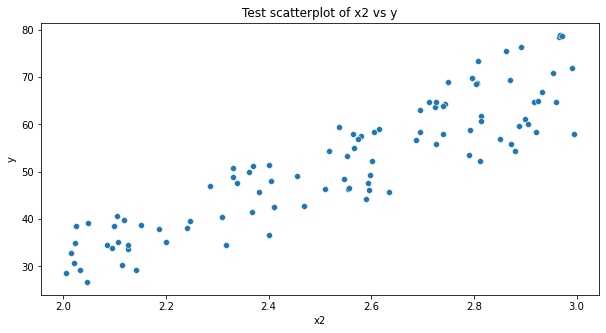

In [16]:
for i in ['x1','x2']:
    plt.figure(figsize=(10,5))
    plt.title('Test scatterplot of ' + i + ' vs y')
    plt.xlabel(i)
    plt.ylabel('y')
    sns.scatterplot(test[i],test['y'])
    plt.show()

/Users/ikmalsyafiqmahadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ikmalsyafiqmahadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ikmalsyafiqmahadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

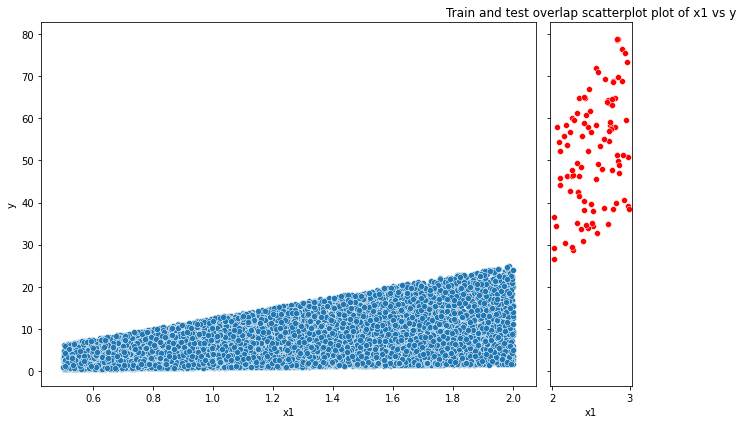

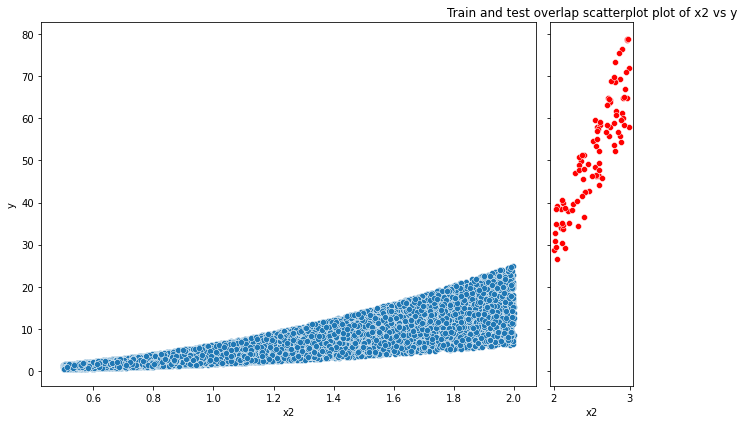

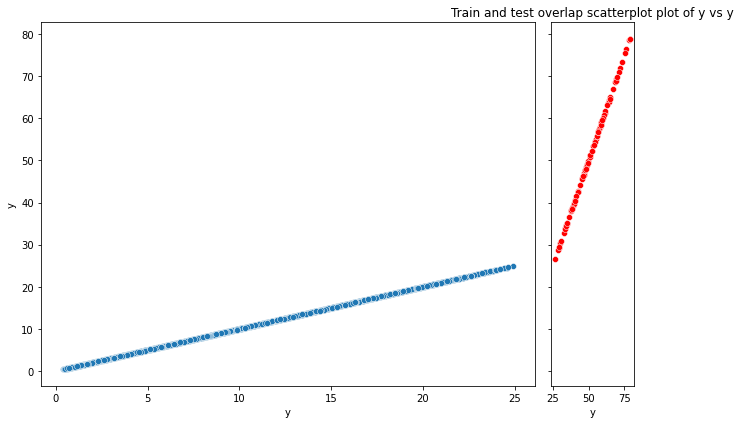

In [17]:
for j in ['x1','x2','y']:  
    f, axs = plt.subplots(1,2,
                      figsize=(9,6),
                      sharey=True,
                     gridspec_kw=dict(width_ratios=[3,0.5]))
    sns.scatterplot(train[j],train['y'],ax=axs[0])
    sns.scatterplot(test[j],test['y'],ax=axs[1],color = 'red')
    plt.title('Train and test overlap scatterplot plot of ' + j + ' vs y')
    f.tight_layout()

Train and test does not intersect.

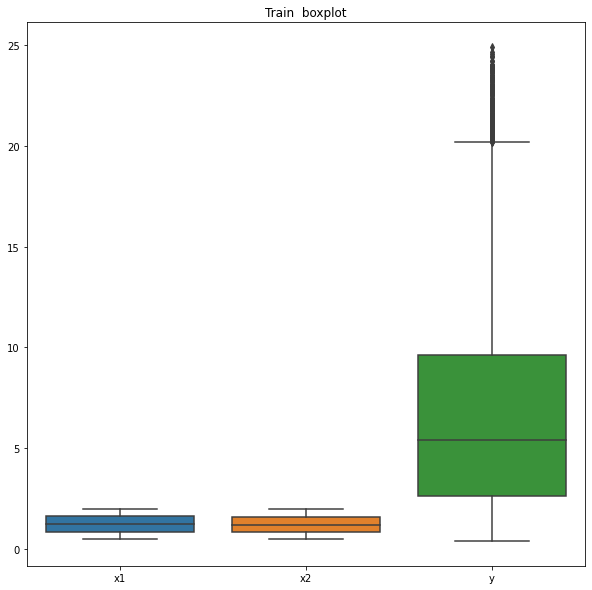

In [18]:
# just to visualize.
sns.boxplot(data=train[['x1','x2','y']])
plt.title('Train  boxplot')
fig=plt.gcf()
fig.set_size_inches(10,10)

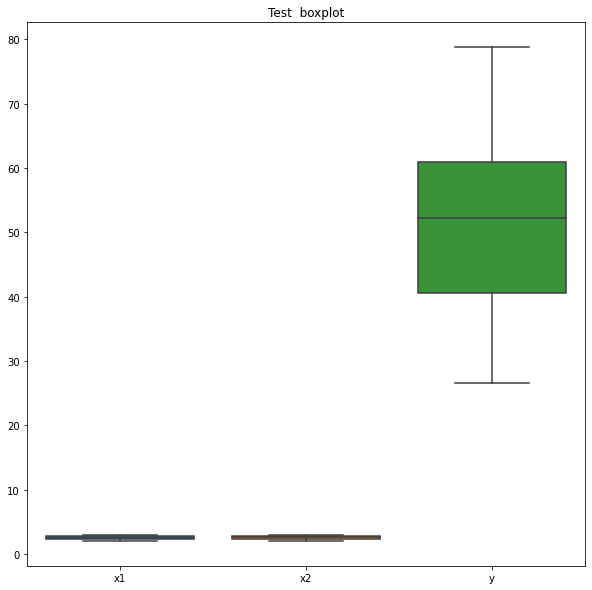

In [19]:
# just to visualize.
sns.boxplot(data=test[['x1','x2','y']])
plt.title('Test  boxplot')
fig=plt.gcf()
fig.set_size_inches(10,10)

There are outliers on train data on y value.

In [20]:
train_outlier = train.copy()
for x in ['y']:
    
    q75,q25 = np.percentile(train_outlier.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_outlier.loc[train_outlier[x] < min,x] = np.nan
    train_outlier.loc[train_outlier[x] > max,x] = np.nan

percent_missing = train_outlier['y'].isnull().sum() * 100 / len(train_outlier['y'])
print('Percentage of outlier = ' + str(percent_missing) + '%')

Percentage of outlier = 2.000200020002%


<AxesSubplot:title={'center':'Correlation Matrix of train'}>

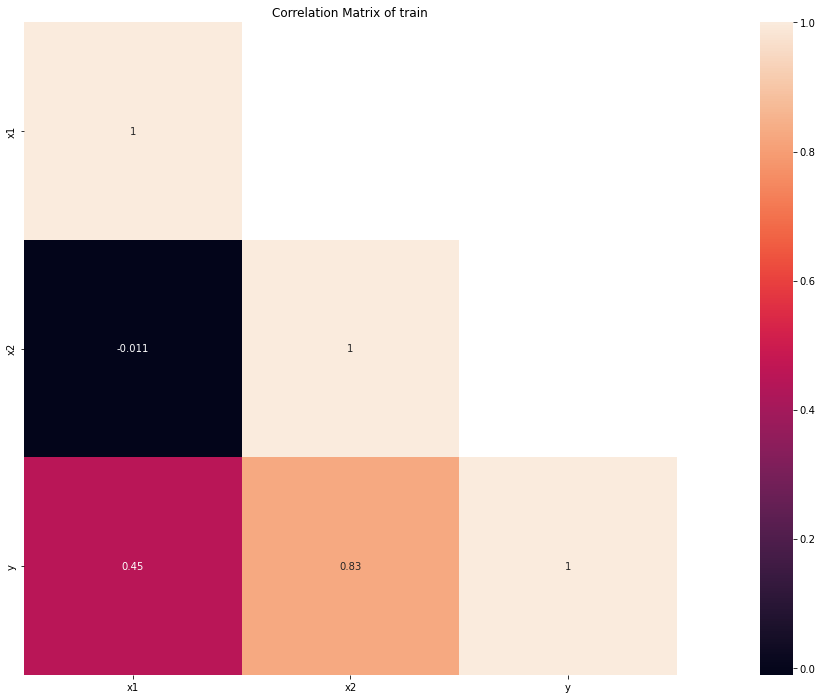

In [21]:
#corelation matrix.
cor_mat= train[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
plt.title('Correlation Matrix of train')
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

<AxesSubplot:title={'center':'Correlation Matrix of test'}>

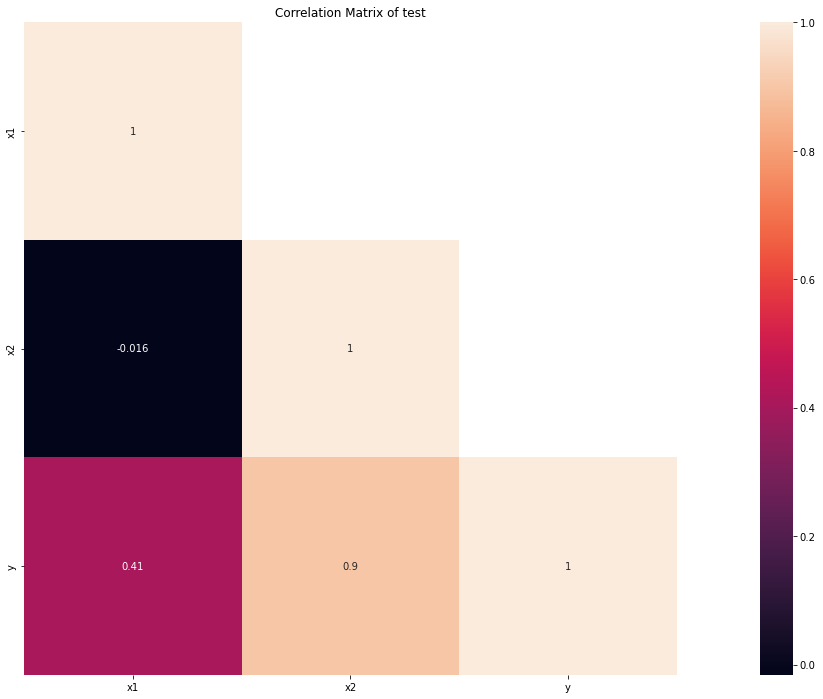

In [43]:
#corelation matrix.
cor_mat= test[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
plt.title('Correlation Matrix of test')
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

No correlation on x1 and x2

c) Use a suitable algorithm to train a machine learning model from the train.csv


Data preparation

Since only 2% of data is outlier, we will remove outliers

In [23]:
for x in ['y']:
    
    q75,q25 = np.percentile(train.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train.loc[train[x] < min,x] = np.nan
    train.loc[train[x] > max,x] = np.nan
train = train.dropna()

Split data intro train and test

Separate target feature

In [24]:
X_train = train.loc[:, train.columns != 'y']
y_train = train['y'] 

X_test = test.loc[:, test.columns != 'y']
y_test= test['y'] 

Split into training and test set

In [25]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
             X_train, y_train, test_size = 0.2, random_state=42)

Model testing

In [27]:
models=[LinearRegression(),AdaBoostRegressor(),BaggingRegressor(),KNeighborsRegressor(),SVR()]
model_names=['LinearRegression','AdaBoostRegressor','BaggingRegressor','KNeighborsRegressor','SVR']
rmse=[]
algorithm = []
d={}
model_data = []

for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train_t,y_train_t)
    model_data.append(clf)
    test_pred_t=clf.predict(X_test_t)
    rmse.append(np.sqrt(mean_squared_error(test_pred_t,y_test_t))) 
    
d={'Modelling Algo':model_names,'RMSE':rmse}  
result_df = pd.DataFrame(d)

d) Interpret the model by showing its metrics.


In [28]:
result_df

,Modelling Algo,RMSE
0,LinearRegression,1.465482
1,AdaBoostRegressor,0.896924
2,BaggingRegressor,0.063964
3,KNeighborsRegressor,0.061668
4,SVR,0.063734


Best model to train the model with is by using SVR because it gives us the lowest RMSE

e) Test.csv contains extrapolated data. Use the trained model to infer/predict the y values in test.csv. You may use y_hat  as the predicted values column and retain the original y column to be used to complete the next step.


In [29]:
y_hat=model_data[4].predict(X_test)
y_hat

array([ 8.59169976, 21.61128331,  8.51236668,  8.6682987 ,  7.87684992,
        9.01688345, 20.37518656,  7.96021183, 13.46633002,  8.77220992,
        8.68395814,  8.31611568,  8.91937814, 10.24573419,  8.79419527,
        9.76199748,  8.42347951, 12.53851696, 12.43564237, 19.30310509,
        8.96127541,  8.07165241,  7.8330104 ,  7.84548416, 12.62416758,
        8.71735494, 12.36780787, 21.91367598,  8.79175893,  8.65825087,
        8.46471864,  7.81921715,  8.22338674,  7.9588088 ,  7.63003851,
       11.13270266,  8.09884466, 10.19877382,  9.44537421, 14.8046232 ,
       14.12854753, 13.34338459,  7.75165315, 13.77992105,  8.10910637,
       14.2138366 , 17.87875064,  8.22929648, 11.28283521,  7.6223615 ,
       11.39342933,  9.30058579,  7.85143508, 11.92703813,  7.61667519,
       15.37741656, 10.07803718,  9.45699311,  8.91203701,  8.23614015,
        8.076838  ,  9.20849867, 13.64163479, 16.80262032,  7.6197507 ,
        8.36954122, 16.96163405,  8.853834  , 17.05270024,  9.36

f) Write down your train and test RMSE. You may attempt to improve your RMSE to as low as possible by experimenting with different ML algorithms or techniques, you may retain all the codes used to test different models and only pick the best result. For reference the base RMSE of test data is 25.36 and average is 15.99 and lowest recorded is 0.24


Tune hypeparameter for SVR (Kernel)

In [30]:
train_RMSE = []
test_RMSE = []
tuned_kernel = {}
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
for parameter in kernel:
    reg = SVR(kernel = parameter)
    reg.fit(X_train, y_train)
    test_pred_t=reg.predict(X_test_t)
    test_pred=reg.predict(X_test)
    train_RMSE.append(np.sqrt(mean_squared_error(test_pred_t,y_test_t))) 
    test_RMSE.append(np.sqrt(mean_squared_error(test_pred,y_test))) 
    
tuned_kernel={'SVR kernel':kernel,'RMSE_train':train_RMSE,'RMSE_test':test_RMSE}  
tuned_kernel_df = pd.DataFrame(tuned_kernel)
    

In [31]:
tuned_kernel_df

,SVR kernel,RMSE_train,RMSE_test
0,linear,1.522940,29.559035
1,poly,0.069126,0.262597
2,rbf,0.062256,44.065942
3,sigmoid,8.728833,48.723390


Tune hyperparameter for SVR (degree)

In [41]:
train_RMSE = []
test_RMSE = []
poly_degree = [0,1,2,3]
tuned_kernel_degree = {}

for degree in poly_degree:
    reg = SVR(kernel = 'poly',degree = degree)
    reg.fit(X_train, y_train)
    test_pred_t=reg.predict(X_test_t)
    test_pred=reg.predict(X_test)
    train_RMSE.append(np.sqrt(mean_squared_error(test_pred_t,y_test_t))) 
    test_RMSE.append(np.sqrt(mean_squared_error(test_pred,y_test))) 
    
tuned_poly_degree={'SVR poly degree':poly_degree,'RMSE_train':train_RMSE,'RMSE_test':test_RMSE}  
tuned_poly_degree_df = pd.DataFrame(tuned_poly_degree)

In [42]:
tuned_poly_degree_df

,SVR poly degree,RMSE_train,RMSE_test
0,0,4.818354,48.391236
1,1,1.522076,29.535860
2,2,0.623500,17.792300
3,3,0.069126,0.262597


The best RMSE we get is using SVR(kernel = 'poly',degree = 2) with test RMSE 17.79